# Capítulo 03 - Visualizando Dados
<br>
<font color='red' size='14px'>Matplotlib</font>

In [6]:
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

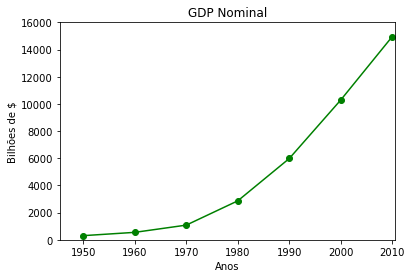

In [26]:
years =[1950,1960,1970,1980,1990,2000,2010]
gdp =[300.2,543.3,1075.9,2862.5,5979.5,10289.7,14958.3]

#criar um gráfico de linha, anos no eixo x, dgp no eixo y, marcaçoes com bolinha, e estilo da linha solido
plt.plot(years, gdp,color='green',marker='o',linestyle='solid')

#Adiciona um título para o nosso gráfico
plt.title('GDP Nominal')

#Adicionamos um label no eixo y
plt.ylabel('Bilhões de $')

#Adicionamos um label no eixo y
plt.xlabel('Anos')

plt.axis([1945.5,2010.5,-5,16000]) #deixei como opcional.Pode retirar se quiser
#plotamos
plt.show()

<h1>Gráficos de Barra</h1>
<h3>Bons para usar quando quiser mostrar algumas quantidades que variam entre um conjunto <span style = "color: red">particular</span> de itens</h3>


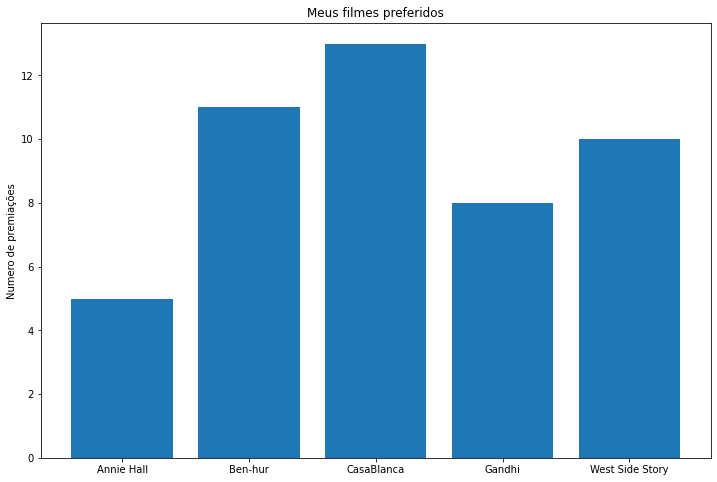

In [53]:
#mudar tamanho dos plots
plt.figure(figsize=(12,8))

movies = ["Annie Hall","Ben-hur","CasaBlanca","Gandhi","West Side Story"]
num_oscars = [ 5,11,13,8,10]

#As barras por padrão tem 0.8 de tamanho. Adicionando 0.1, fará com que fiquem mais centralizadas à esquerda
xs =[ i + 0.1 for i,_ in enumerate(movies)] # 0.1,1,1,2.1....

#eixos x: xs --> com coordenadas à esquerda
#eixo-y: num_oscars
plt.bar(xs, num_oscars)

plt.ylabel("Numero de premiações")
plt.title("Meus filmes preferidos")

#nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i + 0.1  for i,_ in enumerate(movies)],movies)


plt.show()



## Gráfico de Histograma

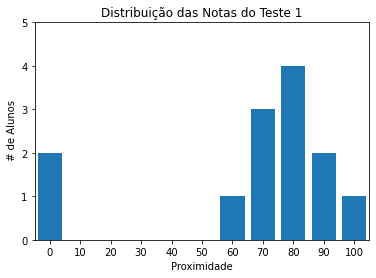

In [117]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]

#decile é uma variável que armazena uma funçao lambda que possui apenas um argumento que é grade.
#Esse argumento será divido de maneira inteira (sem casas decimais) pelo valor 10 e depois multplicado por 10
# seria o mesmo que (grade // 10) * 10
decile = lambda grade: grade // 10*10

#para cada grade de grades, passaremos o decile, que contem a função lambda que divide por inteiro e multiplica por 10, depois
#contabiliza no counter. Assim, o primeiro valor da lista grades (83), será passado para dentro de decile, será dividido por 10
# e resultará em 8 (não queremos casas decimais, por isso o //), depois será mutiplicado por 10 e por fim contabilizado pelo
#counter. Como temos numeros da casa do 80 mais de uma vez, teremos inumeras contagens que se acomulam.
histogram = Counter( decile(grade) for grade in grades)


plt.bar([x for x in histogram.keys()],                                       #X -> os valores de cada casa decimal
        histogram.values(),                                                  #Y -> Número de vezes que aparecem
        8)                                                                   # largura das barras

plt.axis([-5,105,0,5])                                                       #  de -5 até 105 no eixo X e de 0 até 5 no eixo y

plt.xticks([10*i for i in range(11)])                                        # rótulo do eixo X (0,10..90,100)--> range(N-1)

                                                                             # nomeia os eixos X e Y respectivamente
plt.xlabel("Proximidade")
plt.ylabel(" # de Alunos")

                                                                             # da um título ao meu gráfico
plt.title('Distribuição das Notas do Teste 1')

plt.show()

In [172]:
# Maneira como os dados são armazenados dentro de um Counter
# Keys : o valor
# values : número de vezes que é encontrado

print(histogram.values())
print(histogram.keys())

dict_values([4, 2, 3, 2, 1, 1])
dict_keys([80, 90, 70, 0, 100, 60])


<h3><span style ='color:red'>Observação Importante: </span><br><br>Tomar cuidado nos <span style = 'color:green'>plt.axis()</span>, pois não começar y a partir de 0 é considerada uma má prática e pode ocasionar erros de interpretação </h3>

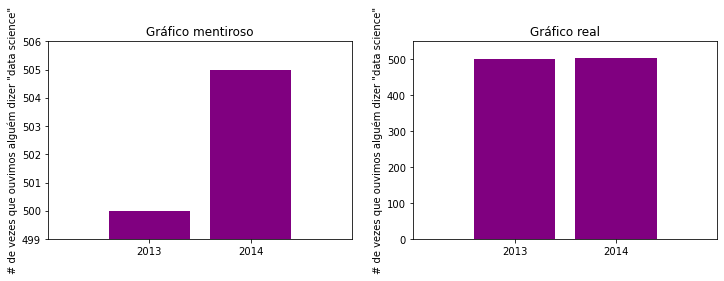

In [170]:
#mudar tamanho dos plots
plt.figure(figsize=(12,8))

mentions = [500, 505]
years = [2013,2014]


#se eu não fizer isso, o matplotlib vai por o eixo X para 0 e 1 e ai adiconionar numeros loucos no canto
plt.ticklabel_format(useOffset = False)

# PRIMEIRO PLOT 1

plt.subplot(221)
plt.bar([2012.6 + 0.4,2013.6 +0.4], mentions,0.8,color='purple')
#enganar o eixo  y para mostrar de 500 para cima hehehe
plt.axis([2012,2015,499,506])   # A partir de 499
plt.title('Gráfico mentiroso')
plt.xticks(years)
plt.ylabel('# de vezes que ouvimos alguém dizer "data science"')


# SEGUNDO PLOT 2

plt.subplot(222)
plt.bar([2012.6 + 0.4,2013.6 +0.4], mentions,0.8,color='purple')
plt.axis([2012,2015,0,550])    # A partir de 0 (Correto)
plt.title('Gráfico real')
plt.xticks(years)
plt.ylabel('# de vezes que ouvimos alguém dizer "data science"')


plt.show()


## Gráfico de Linha

<h3>Bons para mostrar <span style ='color:red'>tendência</span>.</h3>

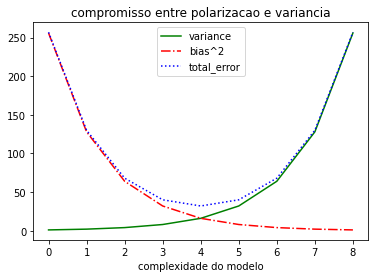

In [3]:
variance=[1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]

total_error=[x+y for x,y in zip(variance,bias_squared)] #pegará cada elemento de cada lista e os somará

xs=[  i for i,_ in enumerate (variance)] #pegará apenas os indices dos elementos da lista variance, ignorando o elemento( "_" )


#fazemos a chamada de inumeros plots dentro do mesmo gráfico
plt.plot(xs, variance, 'g-', label= 'variance') #"g-" gera linha verde sólido
plt.plot(xs, bias_squared, 'r-.', label= 'bias^2') #"r-" gera linha de ponto tracejado vermelho
plt.plot(xs, total_error, 'b:', label= 'total_error') #"b:" gera linha pontilhada da cor azul


plt.legend(loc=9) #loc=9 ----> significa top-center. plt.legend será a nossa legenda que pegará cada plot
plt.xlabel('complexidade do modelo')
plt.title('compromisso entre polarizacao e variancia')

plt.show()

## Gráfico de Dispersão

<h3>Perfeito para visualizar o <span style='color:red'>relacionamento entre dois pares</span> de um conjunto de dados</h3>

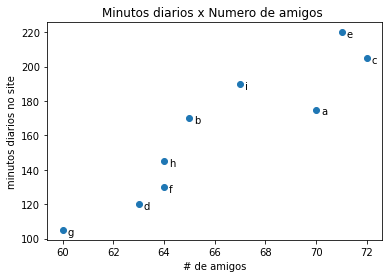

In [4]:
import matplotlib.pyplot as plt

friends =[70,65,72,63,71,64,60,64,67]
minutes =[175,170,205,120,220,130,105,145,190]
labels=[ 'a','b','c','d','e','f','g','h','i']

plt.scatter(friends, minutes)

for label,friend_count,minute_count in zip(labels,friends,minutes): #pegamos cada elemento de cada lista
    plt.annotate(label,                                             #pegaremos cada letra da lista para por ao lado dos pontos
                            xy=(friend_count,minute_count),         #poe cada rótulo na sua posição
                            xytext=(5,-5),                          #corrige as diferenças de localização entre a letra e ponto
                            textcoords='offset points')
                        
plt.title('Minutos diarios x Numero de amigos ')
plt.xlabel('# de amigos')
plt.ylabel('minutos diarios no site')

plt.show()

<h3><span style='color:red'>Observação</span></h3>
<h3>Tomar cuidado quanto a escala, pois o matplotlib pode acabar gerando resultados errados nesses casos</h3>

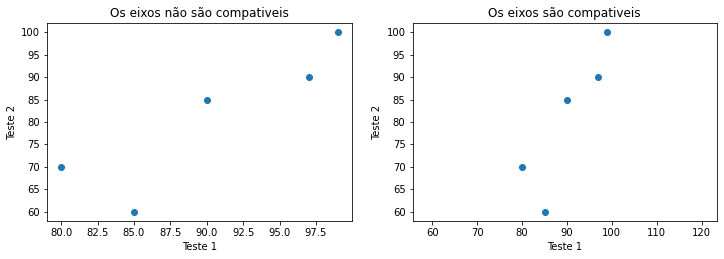

In [20]:
ts1 = [99,90,85,97,80]
ts2 = [100,85,60,90,70]

plt.figure(figsize=(12,8))


plt.subplot(221)
plt.scatter(ts1,ts2)
plt.title('Os eixos não são compativeis')
plt.xlabel('Teste 1')
plt.ylabel('Teste 2')

plt.subplot(222)
plt.scatter(ts1,ts2)
plt.axis("equal") # Diferente do livro cuja versão diz plt.axis("equals")
plt.title('Os eixos são compativeis')
plt.xlabel('Teste 1')
plt.ylabel('Teste 2')


plt.show()

<br>
<font style = 'color:purple' size="14px">Bukeh e Seaborn </font>
<h3>Outras Libs de visualização de gráficos famosas e usadas como alternativa ao Matplotlib</h3>

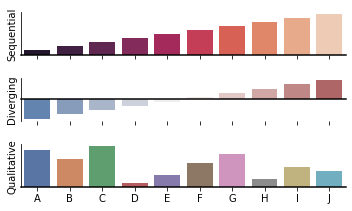

In [10]:
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 3), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)


In [11]:
#SCATTER PLOTS -> GRÁFICOS DE DISPERSÃO

"""
Gráficos de dispersão
O Bokeh pode desenhar muitos tipos de formas visuais (chamadas de glifos), 
incluindo linhas, barras, manchas, blocos hexadecimais e muito mais. 
Uma das tarefas de visualização mais comuns é desenhar um gráfico de dispersão de dados usando pequenos glifos marcadores
para representar cada ponto.
"""
#desenhando uma figura com circulos glyphs 
#criando um novo plot com as ferramentas padrão usando figure
p = figure(plot_width=400, plot_height =400)

#adicionando o circulo com as coordenadas x e y. tamanho, cor e alpha
p.circle([1,2,3,4,5],[6,7,2,4,5],size=15,line_color ="navy",fill_color = "orange",
        fill_alpha=0.5)

show(p)